In [1]:
# Loading the saved_model(change the path according to your directory names)
import tensorflow as tf
import time, os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [30]:
PATH_TO_SAVED_MODEL="/Users/victor/Documents/saved_models/my_centernet/saved_model/"
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

#Load the label_map
category_index = label_map_util.create_category_index_from_labelmap("data/label_map.pbtxt",use_display_name=True)

#Load some test images
img_dir = os.listdir('test_images')

In [31]:
def load_image_into_numpy_array(path):
    return np.array(path)

Text(0.5, 1.0, 'IPI_aug_misc_1.png')

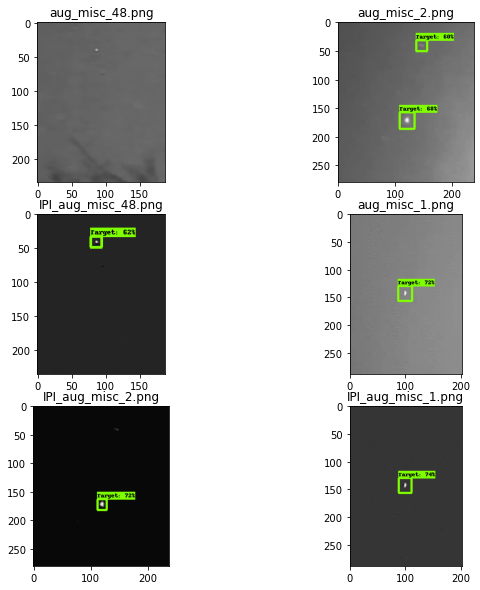

In [52]:
images = []
for image_path in img_dir:
    #print('Running inference for {}... '.format(image_path), end='')
    for i, file in enumerate(img_dir[0:6]):
        fullpath = "test_images/" + file
        image_np = Image.open(fullpath).convert("RGB")
        image_np = load_image_into_numpy_array(image_np) 
        if len(image_np.shape) < 2:
            nimg = (image_np)
            nimg[:,:,0] = image_np
            nimg[:,:,1] = image_np
            nimg[:,:,2] = image_np
            print(nimg.shape)
        else:
            nimg = image_np
        input_tensor=tf.convert_to_tensor(nimg)
        input_tensor=input_tensor[tf.newaxis, ...]
        detections=detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key:value[0, :num_detections].numpy()
        for key,value in detections.items()}
        detections['num_detections'] = num_detections
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        image_np_with_detections = nimg.copy()
        images.append(image_np_with_detections)
        
        viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes'],
              detections['detection_scores'],
              category_index, 
              use_normalized_coordinates=True,
              max_boxes_to_draw=5,     
              min_score_thresh=0.5)

plt.rcParams['figure.figsize'] = [10, 10]
f, axarr = plt.subplots(3,2)

# create a for-loop for this

axarr[0,0].imshow(images[0])
axarr[0,0].set_title(img_dir[0])

axarr[0,1].imshow(images[1])
axarr[0,1].set_title(img_dir[1])

axarr[1,0].imshow(images[2])
axarr[1,0].set_title(img_dir[2])

axarr[1,1].imshow(images[3])
axarr[1,1].set_title(img_dir[3])

axarr[2,0].imshow(images[4])
axarr[2,0].set_title(img_dir[4])

axarr[2,1].imshow(images[5])
axarr[2,1].set_title(img_dir[5])

#cv2.imwrite("frame.jpg", image_np_with_detections)